# Tree Traversal 

Tree traversal is the process of systematically visiting each node in a tree data structure.

There are multiple ways of doing that, such as: **Breadth First Search**. Breadth-First Search (BFS) is a graph traversal algorithm that explores all the nodes at the same distance from the root node before moving to the next level. (It can be used to solve many problems such as finding the shortest path in a graph and solving puzzle games).

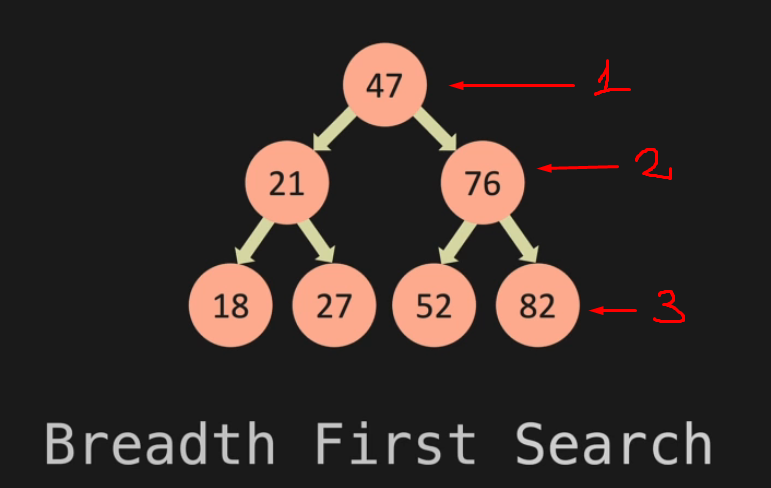


Another example of a tree traversal implementation is doing a **Depth First Search** tree, in which we traverse firstly by the left nodes and then at the bottom right until the root again. DFS uses a strategy that searches “deeper” in the graph whenever possible.

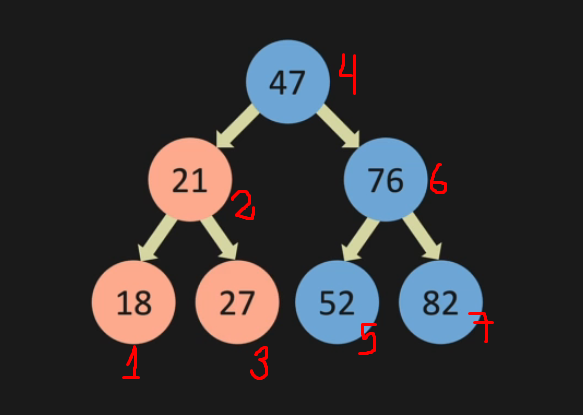


### BFS: Breadth First Search
The Breadth First Search (BFS) algorithm operates by simultaneously managing a queue and a returned list. Initially, the queue starts with the root node, storing the entire node (not just its value). It then queries the left and right nodes of the root, adding them to the queue while moving the value of the root node into the list.

Subsequently, the algorithm progresses to the next item in the queue, which is the left node of the root. The left node is queried for its left and right nodes, and these are added to the queue. Simultaneously, the value of the left node of the root is stored in the list.

In the next step, the algorithm repeats this process for the right node of the root, querying its left and right nodes, adding them to the list, and storing the node itself. This sequential method continues for each subsequent node in the list, ensuring a breadth-first exploration of the tree.


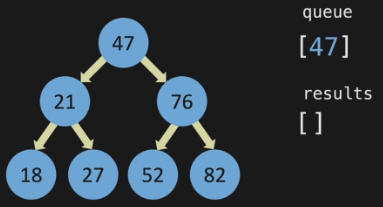
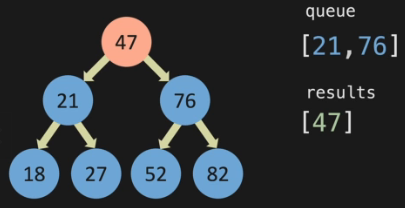
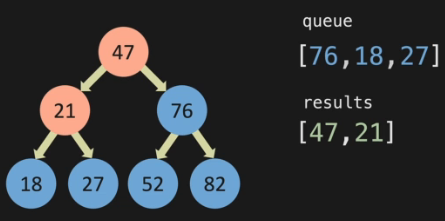
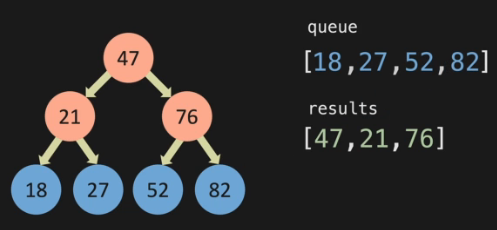
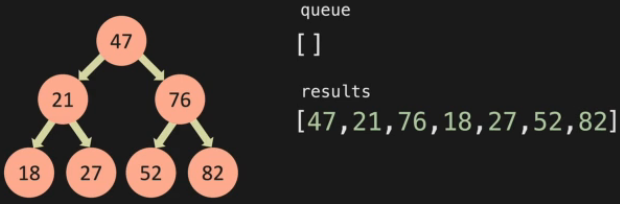


A cool thing about the Breadh First Search is that the resulting list could be easily understood of the tree shape if we split incrementally in a factor of two the nodes:

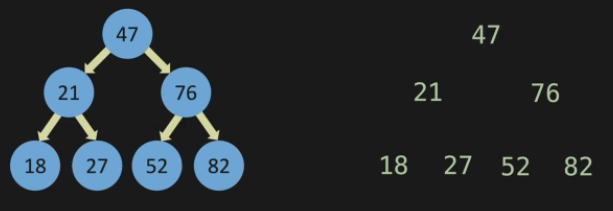


### DFS: Depth First Search

In [1]:
# Code: BFS
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        

class BinarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, value):
        new_node = Node(value)
        if self.root is None:
            self.root = new_node
            return True
        temp = self.root
        while (True):
            if new_node.value == temp.value:
                return False
            if new_node.value < temp.value:
                if temp.left is None:
                    temp.left = new_node
                    return True
                temp = temp.left
            else: 
                if temp.right is None:
                    temp.right = new_node
                    return True
                temp = temp.right

    def contains(self, value):
        if self.root is None:
            return False
        temp = self.root
        while (temp):
            if value < temp.value:
                temp = temp.left
            elif value > temp.value:
                temp = temp.right
            else:
                return True
        return False
    
   
    # YOU CAN ALSO WRITE BFS WITH A QUEUE INSTEAD OF LIST
    # (TECHNICALLY THIS IS A BETTER SOLUTION)
    #
    # def BFS(self):
    #     current_node = self.root
    #     queue = Queue()
    #     results = []
    #     queue.put(current_node)

    #     while not queue.empty():
    #         current_node = queue.get()
    #         results.append(current_node.value)
    #         if current_node.left is not None:
    #             queue.put(current_node.left)
    #         if current_node.right is not None:
    #             queue.put(current_node.right)
    #     return results
                
    
    def BFS(self):
        current_node = self.root
        queue = []
        results = []
        queue.append(current_node)

        while len(queue) > 0: # it will run until the queue is zero.
            current_node = queue.pop(0)
            results.append(current_node.value)
            if current_node.left is not None:
                queue.append(current_node.left)
            if current_node.right is not None:
                queue.append(current_node.right)
        return results





my_tree = BinarySearchTree()
my_tree.insert(47)
my_tree.insert(21)
my_tree.insert(76)
my_tree.insert(18)
my_tree.insert(27)
my_tree.insert(52)
my_tree.insert(82)

print(my_tree.BFS())



[47, 21, 76, 18, 27, 52, 82]


### Depth First Search

We're going to review three methods of this implementation.

### 1. PreOrder
The methods loops and store the values of the nodes starting from the root until the last position to the left, then once there not more nodes at the left, the algorithm goes up to 1 level above from that point and ask for that right node, then it loops until the most possible path to the left and so on.

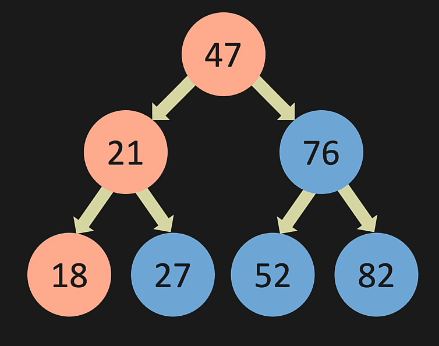
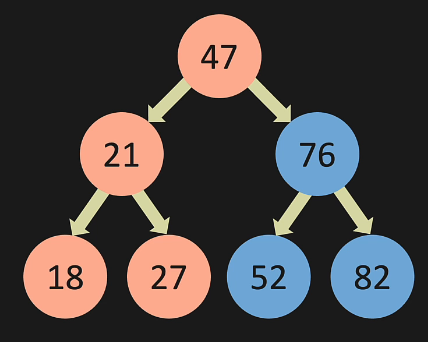
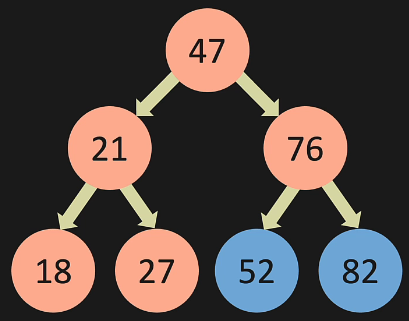
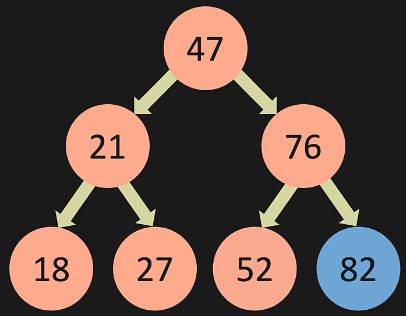
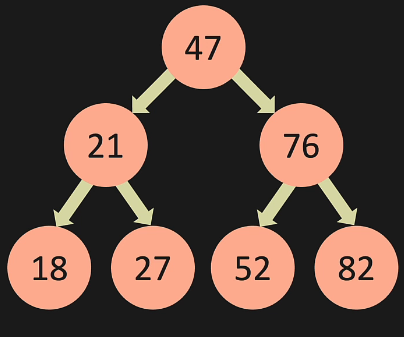

In [16]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        

class BinarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, value):
        new_node = Node(value)
        if self.root is None:
            self.root = new_node
            return True
        temp = self.root
        while (True):
            if new_node.value == temp.value:
                return False
            if new_node.value < temp.value:
                if temp.left is None:
                    temp.left = new_node
                    return True
                temp = temp.left
            else: 
                if temp.right is None:
                    temp.right = new_node
                    return True
                temp = temp.right

    def contains(self, value):
        if self.root is None:
            return False
        temp = self.root
        while (temp):
            if value < temp.value:
                temp = temp.left
            elif value > temp.value:
                temp = temp.right
            else:
                return True
        return False
        
    def BFS(self):
        current_node = self.root
        queue = []
        results = []
        queue.append(current_node)

        while len(queue) > 0:
            current_node = queue.pop(0)
            results.append(current_node.value)
            if current_node.left is not None:
                queue.append(current_node.left)
            if current_node.right is not None:
                queue.append(current_node.right)
        return results
    
    def dfs_pre_order(self):
        results = []
        def traverse(current_node):
            results.append(current_node.value)
            if current_node.left is not None:
                traverse(current_node.left)
            if current_node.right is not None:
                traverse(current_node.right)
        traverse(self.root)
        return results


my_tree = BinarySearchTree()
my_tree.insert(47)
my_tree.insert(21)
my_tree.insert(76)
my_tree.insert(18)
my_tree.insert(27)
my_tree.insert(52)
my_tree.insert(82)

print(my_tree.dfs_pre_order())

[47, 21, 18, 27, 76, 52, 82]


### 2. PostOrder
Visit the left subtree first, then the right subtree, and finally the root.
This is a depth-first traversal algorithm that starts from the root and goes to the end of each branch. The order of traversal is left subtree, right subtree, and then the root. It can be used to get the postfix expression of a tree or to delete the binary tree1. Here is the algorithm for Postorder Traversal:

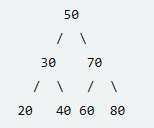




1. Traverse the left subtree. So we start with node 20.
2. Traverse the right subtree. So we move to node 40.
3. Visit the root. So we move up to node 30.
4. Since we’ve visited all of node 2’s children, we go back up to node 1 and move to its right subtree and visit the left child node 60.
5. Then we visit node 80.
6. Finally, we visit that sub-parent node 70.
7. Having visited all of node 1’s children, we visit the root node 50 itself. So, the Postorder traversal for this tree is: [20, 40, 30, 60, 80, 70, 50.]



In [14]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        

class BinarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, value):
        new_node = Node(value)
        if self.root is None:
            self.root = new_node
            return True
        temp = self.root
        while (True):
            if new_node.value == temp.value:
                return False
            if new_node.value < temp.value:
                if temp.left is None:
                    temp.left = new_node
                    return True
                temp = temp.left
            else: 
                if temp.right is None:
                    temp.right = new_node
                    return True
                temp = temp.right

    def contains(self, value):
        if self.root is None:
            return False
        temp = self.root
        while (temp):
            if value < temp.value:
                temp = temp.left
            elif value > temp.value:
                temp = temp.right
            else:
                return True
        return False
        
    def BFS(self):
        current_node = self.root
        queue = []
        results = []
        queue.append(current_node)

        while len(queue) > 0:
            current_node = queue.pop(0)
            results.append(current_node.value)
            if current_node.left is not None:
                queue.append(current_node.left)
            if current_node.right is not None:
                queue.append(current_node.right)
        return results
    
    def dfs_pre_order(self):
        results = []
        def traverse(current_node):
            results.append(current_node.value)
            if current_node.left is not None:
                traverse(current_node.left)
            if current_node.right is not None:
                traverse(current_node.right)
        traverse(self.root)
        return results

    def dfs_post_order(self):
        results = []
        def traverse(current_node):
            if current_node.left is not None:
                traverse(current_node.left)
            if current_node.right is not None:
                traverse(current_node.right)
            results.append(current_node.value)
        traverse(self.root)
        return results



my_tree = BinarySearchTree()
my_tree.insert(50)

my_tree.insert(30)
my_tree.insert(70)

my_tree.insert(20)
my_tree.insert(40)
my_tree.insert(60)
my_tree.insert(80)

print(my_tree.dfs_post_order())


[20, 40, 30, 60, 80, 70, 50]



### 3. InOrder
This technique follows the Left-Root-Right pattern. It means that the left subtree of the root node is traversed first, then the root node, and then the right subtree of the root node is traversed. In the case of binary search trees (BST), Inorder traversal gives nodes in non-decreasing order. Here is the algorithm for Inorder Traversal: 

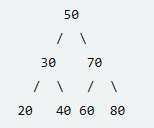



1. Traverse the left subtree. So we start with node 20.
2. Visit the root. So we move up to node 30.
3. Traverse the right subtree. So we move to node 40.
4. Having visited all of node 2’s children, we go back up to both sub-tree parent node 30.
5. Visit the root. So we visit node 50.
6. Traverse the right subtree. So we move to node 60.
7. Visit the root. So we move up to node 70.
8. Traverse the right subtree. So we move to node 80. So, the Inorder traversal for this tree is: [20, 30, 40, 50, 60, 70, 80.]


In [15]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class BinarySearchTree:
    def __init__(self):
        self.root = None

    def insert(self, value):
        new_node = Node(value)
        if self.root is None:
            self.root = new_node
            return True
        temp = self.root
        while (True):
            if new_node.value == temp.value:
                return False
            if new_node.value < temp.value:
                if temp.left is None:
                    temp.left = new_node
                    return True
                temp = temp.left
            else: 
                if temp.right is None:
                    temp.right = new_node
                    return True
                temp = temp.right


    def contains(self, value):
        if self.root is None:
            return False
        temp = self.root
        while (temp):
            if value < temp.value:
                temp = temp.left
            elif value > temp.value:
                temp = temp.right
            else:
                return True
        return False
        

    def BFS(self):
        current_node = self.root
        queue = []
        results = []
        queue.append(current_node)

        while len(queue) > 0:
            current_node = queue.pop(0)
            results.append(current_node.value)
            if current_node.left is not None:
                queue.append(current_node.left)
            if current_node.right is not None:
                queue.append(current_node.right)
        return results
    

    def dfs_pre_order(self):
        results = []

        def traverse(current_node):
            results.append(current_node.value)
            if current_node.left is not None:
                traverse(current_node.left)
            if current_node.right is not None:
                traverse(current_node.right)

        traverse(self.root)
        return results

    def dfs_post_order(self):
        results = []
        def traverse(current_node):
            if current_node.left is not None:
                traverse(current_node.left)
            if current_node.right is not None:
                traverse(current_node.right)
            results.append(current_node.value)
        traverse(self.root)
        return results

    def dfs_in_order(self):
        results = []
        def traverse(current_node):
            if current_node.left is not None:
                traverse(current_node.left)
            results.append(current_node.value) 
            if current_node.right is not None:
                traverse(current_node.right)          
        traverse(self.root)
        return results
        

my_tree = BinarySearchTree()
my_tree.insert(50)
my_tree.insert(30)
my_tree.insert(70)

my_tree.insert(20)
my_tree.insert(40)
my_tree.insert(60)
my_tree.insert(80)

print(my_tree.dfs_in_order())

[20, 30, 40, 50, 60, 70, 80]
